In [1]:
import boto3
import csv
import json
import io
from PIL import Image, ImageDraw, ExifTags, ImageColor

In [2]:
def show_faces(photo):
    client = boto3.client('rekognition',
                      aws_access_key_id = access_key_id,
                      aws_secret_access_key = secret_access_key,
                      region_name='ap-south-1')
    
    with open(photo, 'rb') as source_image:
        source_bytes = source_image.read()
    stream = io.BytesIO(source_bytes)
    image = Image.open(photo,'r')      
#     image=Image.open(im)

    #Upload through imageBytes.

    #response is not limited.
    response = client.detect_faces(Image = {'Bytes': source_bytes,},Attributes=['ALL'])

    imgWidth, imgHeight = image.size  
    draw = ImageDraw.Draw(image)  
                    

    # calculate and display bounding boxes for each detected face       
    print('Detected faces for ' + photo)    
    for faceDetail in response['FaceDetails']:
        print('The detected face is between ' + str(faceDetail['AgeRange']['Low']) + ' and ' + str(faceDetail['AgeRange']['High']) + ' years old')
        box = faceDetail['BoundingBox']
        left = imgWidth * box['Left']
        top = imgHeight * box['Top']
        width = imgWidth * box['Width']
        height = imgHeight * box['Height']
        print('Left: ' + '{0:.0f}'.format(left))
        print('Top: ' + '{0:.0f}'.format(top))
        print('Face Width: ' + "{0:.0f}".format(width))
        print('Face Height: ' + "{0:.0f}".format(height))

        points = (
            (left,top),
            (left + width, top),
            (left + width, top + height),
            (left , top + height),
            (left, top)

        )
        draw.line(points, fill='#00d400', width=2)

        # Alternatively can draw rectangle. However you can't set line width.
        #draw.rectangle([left,top, left + width, top + height], outline='#00d400') 

    image.show()
    
    
    from IPython.display import display


#     path="/path/to/image.jpg"
    display(image)

    return len(response['FaceDetails'])

In [3]:
#Using Credentials
with open('credentials.csv','r') as input:
    next(input)
    reader = csv.reader(input)
    for line in reader:
        access_key_id = line[2]
        secret_access_key = line[3]

In [4]:
#initializing client
client = boto3.client('rekognition',
                      aws_access_key_id = access_key_id,
                      aws_secret_access_key = secret_access_key,
                      region_name='ap-south-1')

In [6]:
#Do this for each photo that is taken from the user's app that is updated to the server.
#images should be in jpg or png format
#attribute ALL provides all additional features of face
def facial_comparision(target_photo,source_photo):
    with open(source_photo, 'rb') as source_image:
        source_bytes = source_image.read()

    with open(target_photo, 'rb') as target_image:
        target_bytes = target_image.read()
    
    #Upload through imageBytes.

    #response is not limited.
    response = client.compare_faces(SourceImage = {'Bytes': source_bytes,},TargetImage = {'Bytes': target_bytes,})
    print(json.dumps(response, indent=2))
    

In [7]:
facial_comparision("me_1.jpg","me_2.jpg")

{
  "SourceImageFace": {
    "BoundingBox": {
      "Width": 0.1539979875087738,
      "Height": 0.3437119722366333,
      "Left": 0.3914906978607178,
      "Top": 0.3000345528125763
    },
    "Confidence": 99.99960327148438
  },
  "FaceMatches": [
    {
      "Similarity": 98.05458068847656,
      "Face": {
        "BoundingBox": {
          "Width": 0.2893831133842468,
          "Height": 0.7169443964958191,
          "Left": 0.3699200749397278,
          "Top": 0.22184252738952637
        },
        "Confidence": 100.0,
        "Landmarks": [
          {
            "Type": "eyeLeft",
            "X": 0.4375455677509308,
            "Y": 0.49709606170654297
          },
          {
            "Type": "eyeRight",
            "X": 0.5752426385879517,
            "Y": 0.48844754695892334
          },
          {
            "Type": "mouthLeft",
            "X": 0.4538576006889343,
            "Y": 0.7469646334648132
          },
          {
            "Type": "mouthRight",
         

Detected faces for me_1.jpg
The detected face is between 22 and 34 years old
Left: 473
Top: 160
Face Width: 370
Face Height: 516


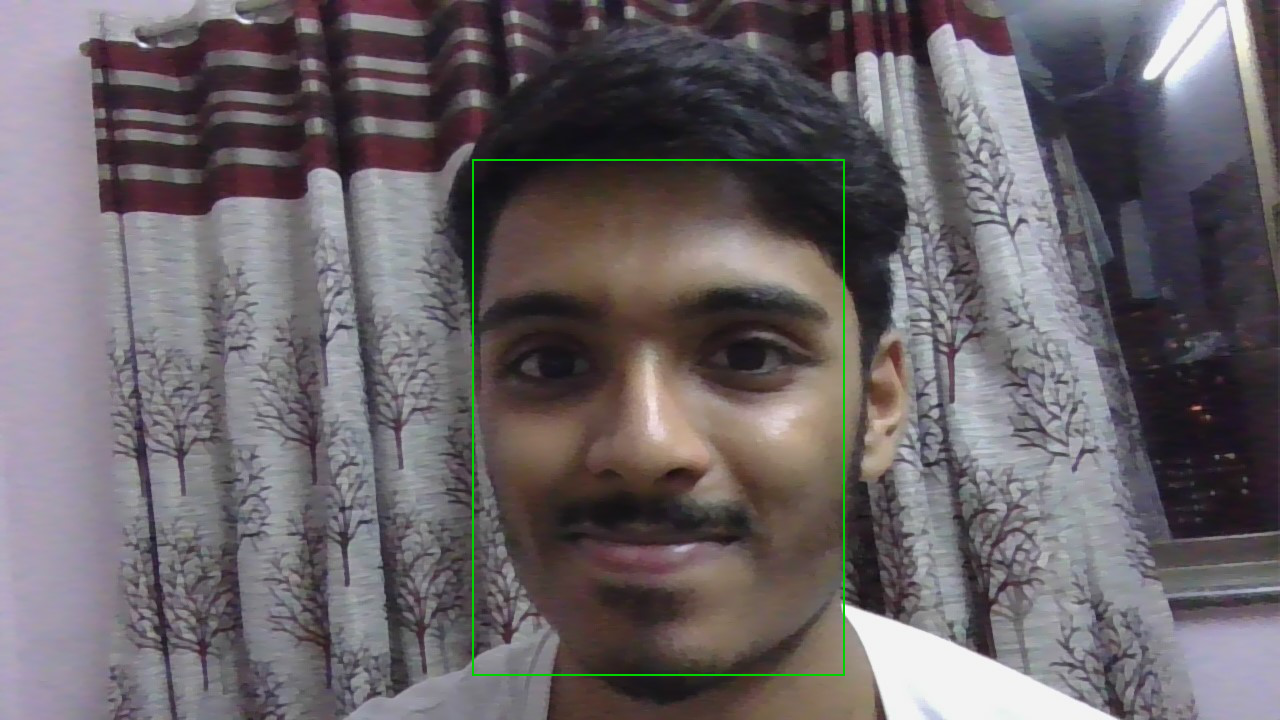

1

In [8]:
show_faces("me_1.jpg")

Detected faces for me_2.jpg
The detected face is between 17 and 29 years old
Left: 501
Top: 216
Face Width: 197
Face Height: 247


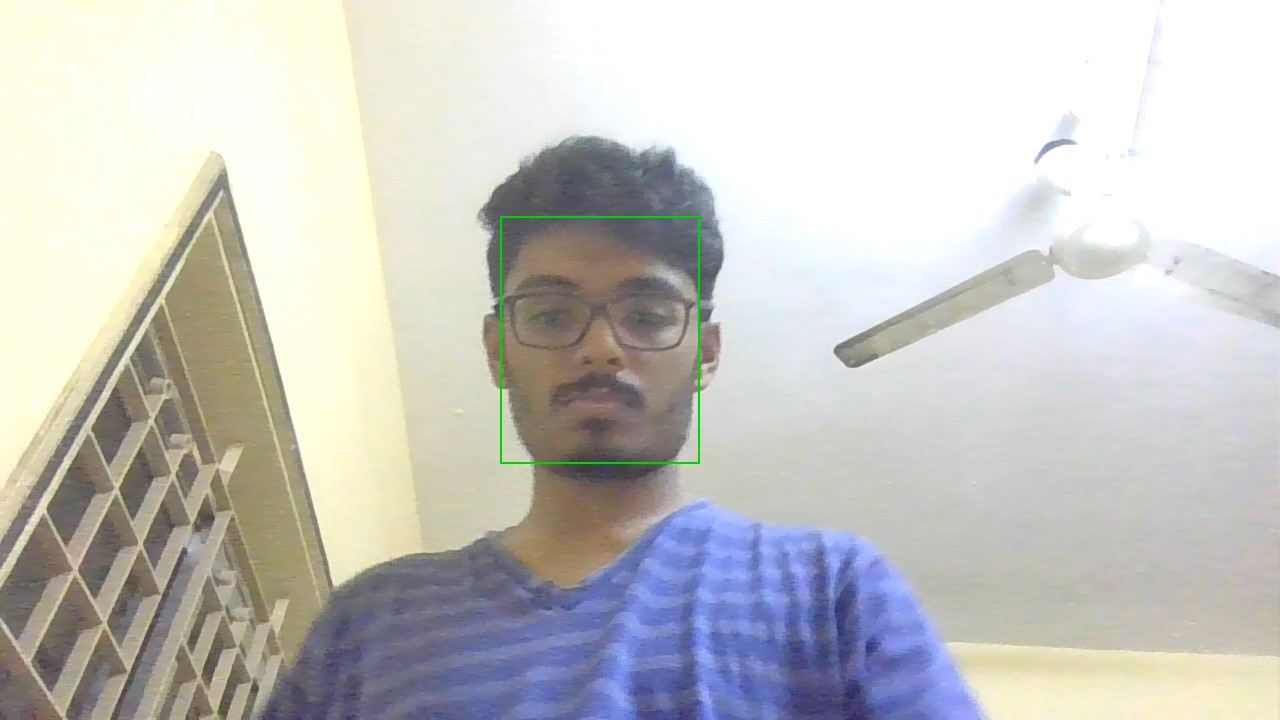

1

In [9]:
show_faces("me_2.jpg")